# 데이터 분석 프로세스

- 초기화 및 파이썬 모듈 로딩
    - sklearn => 머신러닝
    - scipy => 수치 계산
    - pandas => 데이터 로딩, 수치 계산
    - numpy => 수치 계산
    - matplotlib => 시각화
- 데이터 수집
- 데이터 탐색 및 준비
    - 결측치, 이상치에 대한 처리
    - 추가 변수에 대한 처리
    - 훈련데이터와 테스트데이터로 분리
- 모델 훈련
    - 정형데이터분석(sklearn 기준, fit -> predict -> score)
        - 지도학습 ⇒ 타겟 변수가 존재
            - 분류
                - 의사결정나무 
                  - 분류, 회귀 둘다 사용 가능
                  - 이해쉽지만, 과대적합 가능성 크고, 경계면의 데이터 분류가 잘못될 수 있음
                - 앙상블(배깅,부스팅,랜덤포레스트)
                  - 랜덤포레스트 
                    - 성능 우수(결정트리 여러개 사용), 차원높고 희소한 데이터에는 잘 동작 안함
                  - 부스팅
                    - 랜포와 유사하게 성능 우수하나, 훈련 시간이 오래 걸림, 매개변수 튜닝이 중요
                  - 배깅
                - SVM(초평면, 커널함수)
                - k-NN
                - ANN
                - 로지스틱회귀
                - 나이브베이즈
            - 예측
                - 선형회귀
                    - 단순선형회귀
                    - 다중선형회귀
                    - 릿지 회귀
                    - 라쏘 회귀
                    - 엘라스틱넷 회귀
                - 비선형회귀
                    - 다항회귀(polynomial regression)
        - 비지도학습 ⇒ 타겟 변수 미존재
            - 군집
                - 계층적군집
                - 비계층적군집
                - 혼합분포군집
            - 연관분석(장바구니분석)
    - 비정형데이터분석
        - 텍스트마이닝
- 모델 성능 평가
    - 분류
        - 정오분류표(혼동행렬) ⇒ accuracy가 1에 가까울수록 좋은 모델
        - ROC/AUC ⇒ AUC가 1에 가까울수록 좋은 모델
    - 예측 ⇒ MAE, RMSE
- 모델 성능 개선

# 군집
## 군집 종류
- 계층군집(병합군집), 비계층군집(K평균), 밀도기반군집(DBSCAN) 등
- 계층군집(병합군집)
  - 클러스터링 시작시에 개별 포인트를 하나의 클러스터로하고, 종료조건 만족까지 합쳐나감
  - 덴드로그램을 이용해서 군집을 시각화한 후에 군집 개수를 정해볼 수 있음
    - sklearn에는 없고 scipy에 덴드로그램 및 유사도 계산 함수가 있음
    - ward, average, complete
      - ward => 클러스터내 분산을 가장 작게 증가시키는 클러스터를 합침
      - average => 클러스터내 평균 거리가 가장 짧은 클러스터를 합침
      - complete => 클러스터내 최대 거리가 가장 짧은 두 클러스터를 합침
- 비계층군집(K평균)
  - 처음부터 K개 군집을 지정하고 시작해서, 샘플을 추가해가고 군집 중심을 재계산하면서 클러스터링 

## 군집 비교 평가
- ARI(adjused rand index)
  - 군집데이터이지만 정답 분류 범주를 알고있는 경우에 사용(당연히 보통은 모름)
  - 1(최적) ~ 0(무작위 분류)
- 실루엣계수(silhouette coefficient)
  - 클러스터의 밀집 정도 계산, 최대 점수는 1


(100, 2)
(100,)


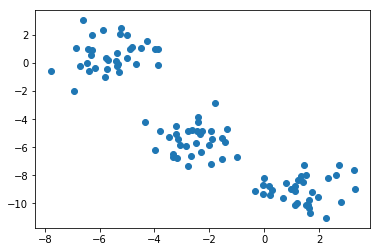

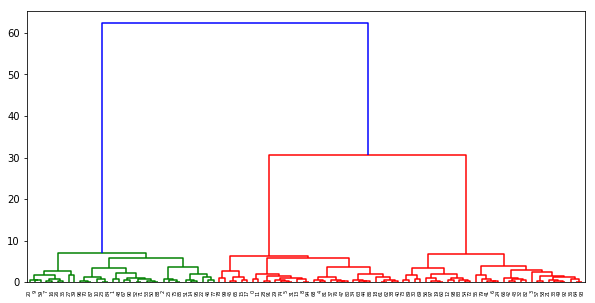

In [48]:
# 덴드로그램을 통한 군집 시각화
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics, model_selection
from sklearn.cluster import AgglomerativeClustering


# 데이터 수집
x, y = datasets.make_blobs(
    n_samples = 100
    , random_state = 16
)

# 데이터 탐색 및 준비
print(x.shape)
print(y.shape)

# 산점도
plt.scatter(x[:,0], x[:,1])

# 각 점들간 거리 (ward)를 계산해서 반환
linkage_array = ward(x)

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
hierarchy.dendrogram(linkage_array)
plt.show()

